# ASSIGNMENT #3 - ATMOSPHERIC SOUNDINGS #
Due: 04 March 2023 @ 11:59p

Purpose:\
The purpose of this assignment is to continue to strengthen skills with reading in data and begin to familiarize with plotting data on standard plots, skew-t log-p diagrams and hodographs.

Overview:\
In this assignment you will read in atmospheric sounding data and plot that data using several methods.


| | UPDATE TO YOUR INFORMATION | 
| :- | :- |
| Created By | Tyler Stebbins |
| Creation Date | 17 January 2024 |
| Course | ATSC 270 - Computer Concepts in Meteorology |

In [6]:
### UPDATE TO YOUR INFORMATION ###
#information allowing anyone with the code to print the author and contact information
__author__    = "Tyler Stebbins"
__contact__   = "tyler.stebbins@und.edu"

### IMPORT REQUIRED LIBRARIES ###

In [7]:
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from metpy.plots import Hodograph, SkewT
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### OPEN SOUNDING CSV FILE ###
Open the CSV file you created last lab.  Make sure to copy it into this directory.

In [8]:
#opening the file and reading it into lists
data = pd.read_csv("KBIS_sounding.csv", delimiter=',',skiprows=1)

print (data)

    pressure[mb]  height[m]  temperature[degC]  dewpoint[degC]  u-wind[m/s]  \
0         1000.0      355.0                NaN             NaN          NaN   
1          959.0      649.0              -25.3           -28.8          NaN   
2          949.0      726.0              -24.1           -27.6          NaN   
3          936.0      826.0              -22.7           -28.7          NaN   
4          925.0      915.0              -22.9           -28.9         2.98   
5          898.0     1131.0              -22.9           -28.9          NaN   
6          851.0     1526.0              -21.3           -35.3          NaN   
7          850.0     1536.0              -21.3           -35.3         2.57   
8          763.0     2328.0              -22.5           -40.5          NaN   
9          730.0     2651.0              -24.1           -41.1          NaN   
10         721.0     2741.0              -23.1           -41.1          NaN   
11         707.0     2884.0              -22.9      

### EXTRACT VARIABLES AND ADD UNITS ###
make sure winds are converted to knots

In [5]:
#grabs the first line which is the title of the data
title = open("KBIS_sounding.csv", 'r').readlines()[0]

print(title)
#grab each variable and add units
#creating new variables for each column of data
pressure = np.array(data['pressure[mb]'])*units('millibars')
height = np.array(data['height[m]'])*units('meters')
tmp = np.array(data['temperature[degC]'])*units('degC')
dwp = np.array(data['dewpoint[degC]'])*units('degC')
u = np.array(data['u-wind[m/s]'])*units('m/s').to('knots')
v = np.array(data['v-wind[m/s]'])*units('m/s').to('knots')

#adding units to each variable
#pressure = pressure*units('millibars')
#height = height*units('meters')
#tmp = tmp*units('degC')
#dwp = dwp*units('degC')
#u = u*units('m/s')
#v = v*units('m/s')

#converting U and V components to knots
#u = u.to('knots')
#v = v.to('knots')

print(height)

KBIS - 2009-01-15 12:00:00

[355.0 649.0 726.0 826.0 915.0 1131.0 1526.0 1536.0 2328.0 2651.0 2741.0 2884.0 2961.0 3960.0 5231.0 5370.0 5906.0 6530.0 6761.0 6920.0 8820.0 9842.0 9970.0 10548.0 10946.0 11095.0 11380.0 11637.0 11939.0 12219.0 12474.0 12662.0 12936.0 13190.0 13577.0 14084.0 15064.0 15348.0 15465.0 15710.0 16259.0 17204.0 17900.0 18022.0 19071.0 19680.0 19920.0 20266.0 23000.0 25420.0 25450.0] meter


### PLOT TEMPERATURE & DEWPOINT VS HEIGHT ###

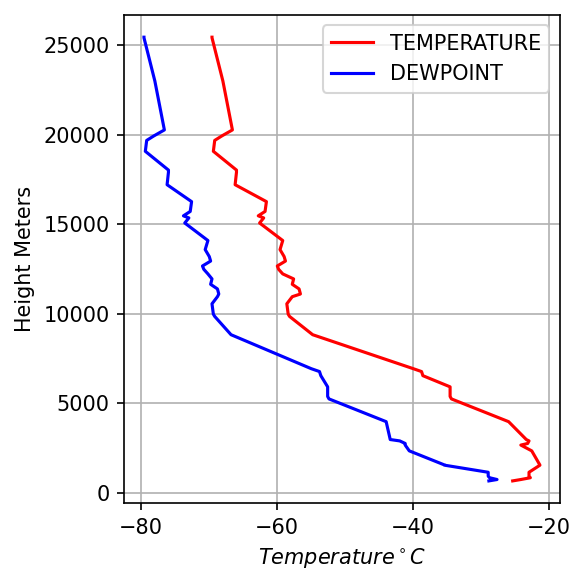

In [13]:
#create a figure
fig = plt.figure(figsize = (4,4), dpi = 150)

#create subplot
plot1 = plt.subplot(1,1,1)


#plot temperature on the x-axis, height on the y-axis in red
#give it the label of TEMPERATURE
plt.plot(tmp, height, color = 'red', label = 'TEMPERATURE')


#plot dewpoint in blue
#give it the label of DEWPOINT
plt.plot(dwp, height, color = 'blue', label = 'DEWPOINT')

#add a background grid
plt.grid()

#add a x label with units (including the degree symbol) - google it and figure it out :)
plt.xlabel("$Temperature {^\circ}C$")

#add a y label with units 
plt.ylabel("Height Meters")

#add a legend
plt.legend()

#this is added to make sure labels don't get cut off
fig.tight_layout()
#save the figure as temp_dwpt.png
plt.savefig('temp_dwpt.png')

While this is nice, it's not particularly useful to us for analyzing the current weather or making a forecast.

For that, we typically examine Skew-T Log-P diagrams.  For this, we will be following a modified version of the "Skew-T with Complex Layout" example on MetPy's website (https://unidata.github.io/MetPy/latest/examples/plots/Skew-T_Layout.html)

### PLOT DATA ON SKEW-T ###

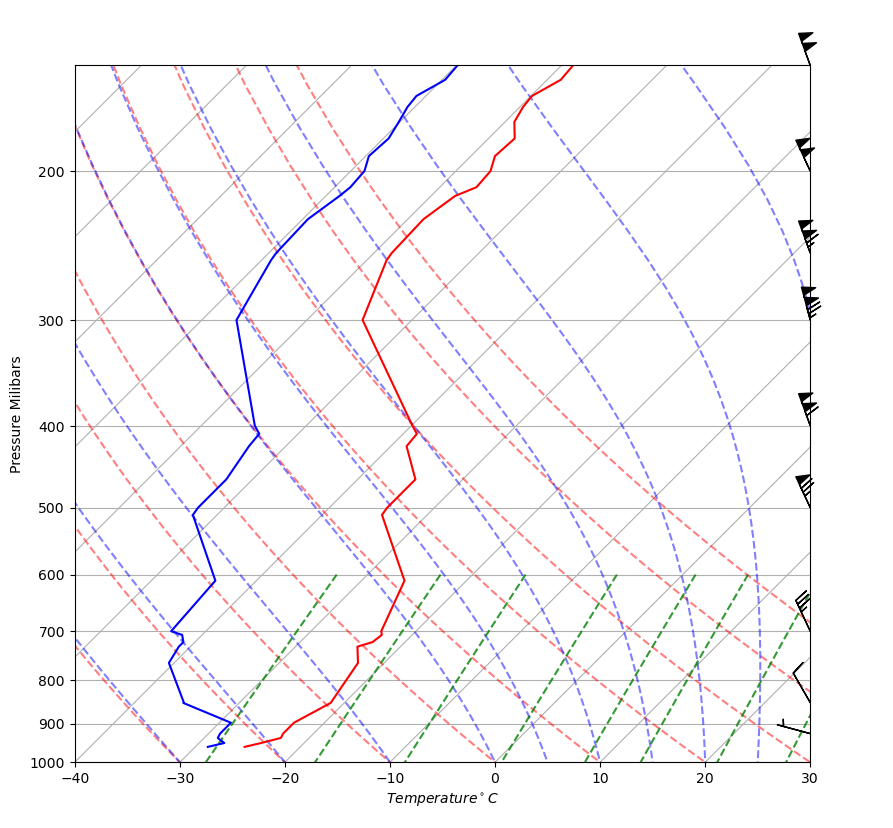

In [6]:
#create a figure and give it a figsize of 9x9, with a dpi of 100
fig = plt.figure(figsize = (9,9), dpi = 100)

#create Skew-T
skew = SkewT(fig,rotation=45)

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add a x axis labels with units
plt.xlabel("$Temperature {^\circ}C$")

#add a y label with units 
plt.ylabel("Pressure Milibars")

#add temperature in red
skew.plot(pressure, tmp, color = 'red')

#add dewpoint in blue
skew.plot(pressure, dwp, color = 'blue')

#plot wind barbs
skew.plot_barbs(pressure, u, v)

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-40,30)

#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(1000, 150)

#to make sure everything looks okay
fig.tight_layout()

#save the skew T as skewT.png
plt.savefig('skewT.png')


### PLOT HODOGRAPH ###
The plot will not look correct if you do not remove NaNs

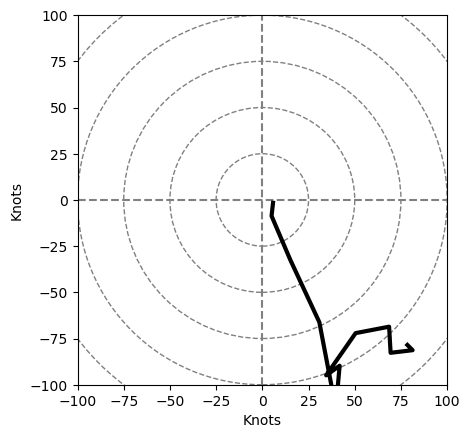

In [7]:
#remove nans from u and v
hodo_u = u[~np.isnan(u)]
hodo_v = v[~np.isnan(v)]
#print(hodo_u)
#create the hodograph (have the range from 0-100kts with 25kt increment)
#make the wind curve black

plot2 = plt.subplot(1,1,1)
h = Hodograph(plot2, component_range=100.)
h.add_grid(increment=25)
h.plot(hodo_u, hodo_v, color ='black')

#add x and y labels
plt.xlabel("Knots")
plt.ylabel("Knots")

#to make sure everything looks okay
fig.tight_layout()

#save figure as hodo.png
plt.savefig('hodo.png')

### PLOT SKEW-T & HODOGRAPH ON SAME FIGURE ###

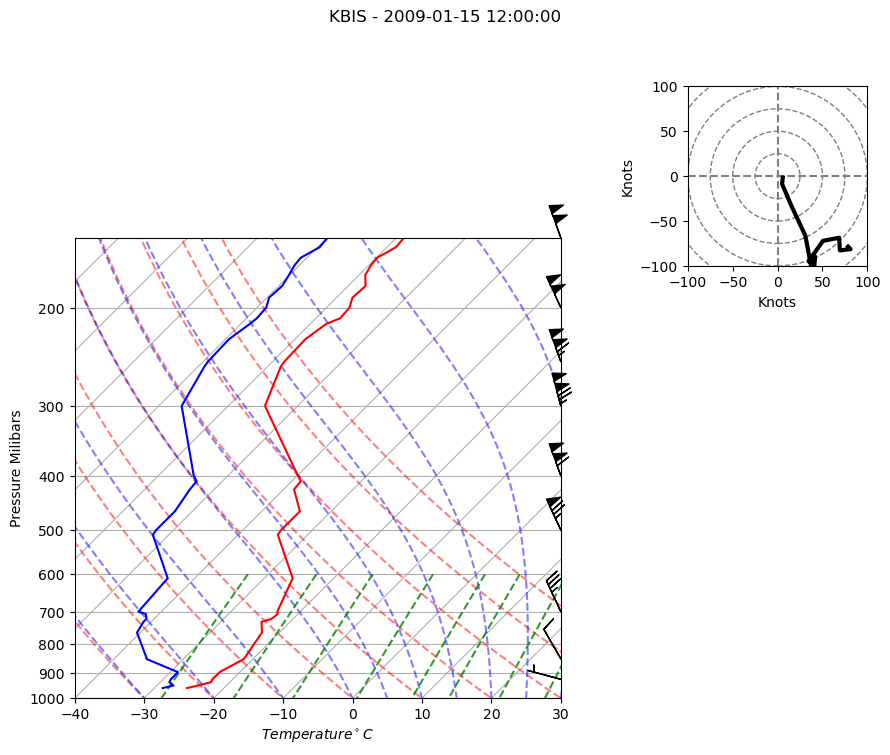

In [8]:
fig = plt.figure(figsize=(9,9),dpi=100)

gs = gridspec.GridSpec(3,3)
skew = SkewT(fig, rotation=45, subplot=gs[:,:2])

#add dry adiabats
skew.plot_dry_adiabats()
#add moist adiabats
skew.plot_moist_adiabats()
#add mixing ratio lines
skew.plot_mixing_lines()

#add axis labels with units
plt.xlabel("$Temperature {^\circ}C$")
#add a y label with units 
plt.ylabel("Pressure Milibars")

#add temperature in red
skew.plot(pressure, tmp, color = 'red')
#add dewpoint in blue
skew.plot(pressure, dwp, color = 'blue')

#plot wind barbs
skew.plot_barbs(pressure, u, v)

#set x-axis limits that look good (use your eyes)
skew.ax.set_xlim(-40,30)
#set y-axis limits that include the tropopause but not a ton of the stratosphere
skew.ax.set_ylim(1000, 150)
#add a hodograph
ax = fig.add_subplot(gs[0,-1])
h = Hodograph(ax, component_range=100.)
h.add_grid(increment=25)
h.plot(hodo_u, hodo_v, color ='black')

#add x and y labels
plt.xlabel("Knots")
plt.ylabel("Knots")
#add a title with the date and launch location:
plt.suptitle(title)

#to make sure everything looks okay
fig.tight_layout()

#save the figure as skew_hodo.png
plt.savefig('skew_hodo.png')

[1000.0 959.0 949.0 936.0 925.0 898.0 851.0 850.0 763.0 730.0 721.0 707.0 700.0 610.0 510.0 500.0 463.0 423.0 409.0 400.0 300.0 255.0 250.0 228.0 214.0 209.0 200.0 192.0 183.0 175.0 168.0 163.0 156.0 150.0 141.0 130.0 111.0 106.0 104.0 100.0 91.5 78.4 70.0 68.6 57.6 52.0 50.0 47.2 30.0 20.0 19.9] millibar


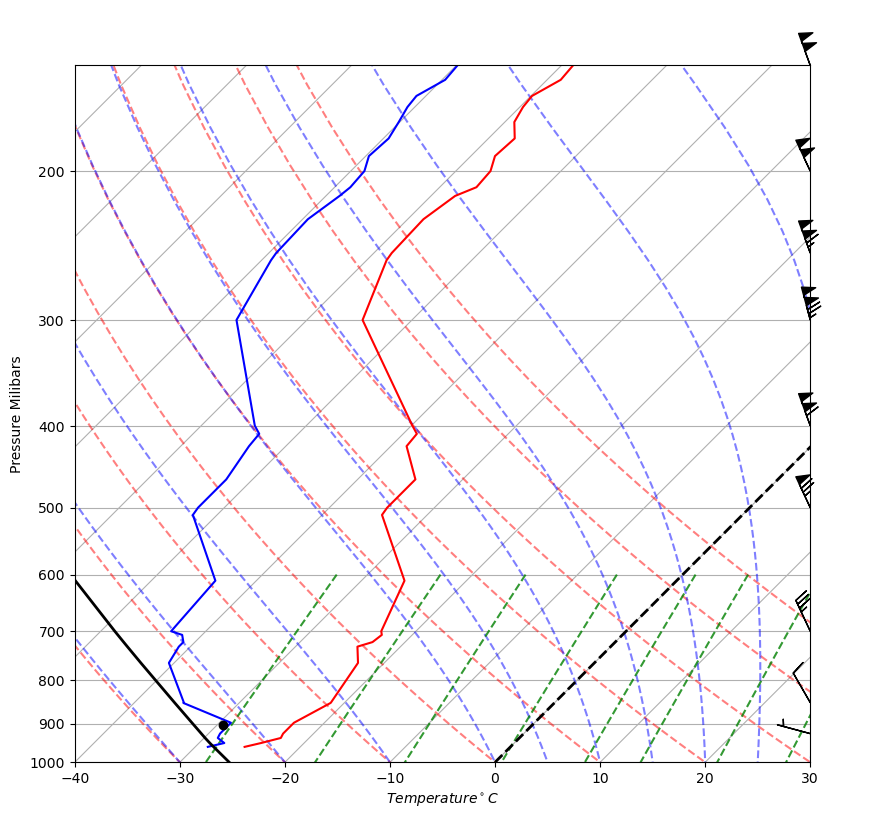

In [9]:
#Advanced Sounding
fig = plt.figure(figsize = (9,9), dpi = 100)
skew = SkewT(fig,rotation=45)
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.xlabel("$Temperature {^\circ}C$")
plt.ylabel("Pressure Milibars")

skew.plot(pressure, tmp, color = 'red')
skew.plot(pressure, dwp, color = 'blue')
skew.plot_barbs(pressure, u, v)

skew.ax.set_xlim(-40,30)
skew.ax.set_ylim(1000, 150)

print(pressure)

#Calculate LCL
lcl_pressure, lcl_temperature = mpcalc.lcl(pressure[1],tmp[1],dwp[1])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

#Parcel Profile
prof = mpcalc.parcel_profile(pressure, tmp[1], dwp[1]).to('degC')
skew.plot(pressure, prof, 'k', linewidth=2)

#CAPE
skew.shade_cin(pressure, tmp, prof, dwp)
skew.shade_cape(pressure, tmp, prof)

#Freezing level isotherm
skew.ax.axvline(0, color='black', linestyle='--', linewidth=2)

fig.tight_layout()